<a href="https://colab.research.google.com/github/CJ-Kaufman/INDE577_2024/blob/main/Supervised_Learning/Decision%20Trees%20and%20Regression%20Trees/Decision_Regression_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees and Regression Trees Implementation
## Decision Trees
### Introduction
Decision trees can be used for classification or regression. It is a non-parametric model that predicts the value of something by training decision rules based on the features of the data. A decision tree utilizes root nodes, decision nodes, and leaf nodes to split the data into smaller and smaller groups until a useful classification or estimation can be made. The starting point which contains all of the data is called the root node, and the ending point (the last separation from which no other decisions branch down further) is called the leaf node.

In this example, we will use a data set with information about different types of wine to train a model for binary classification.


### Imports and Data Loading

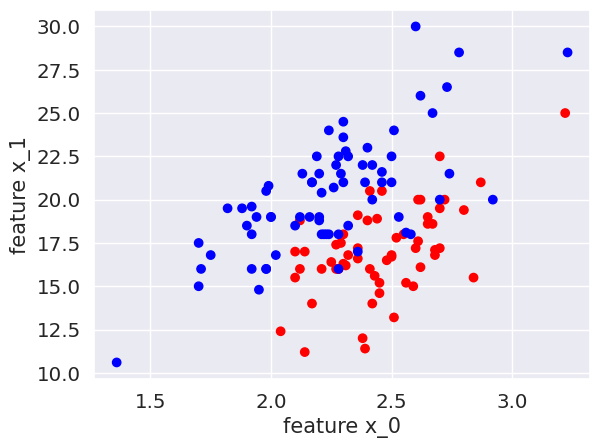

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# The data will be taken from sklearn.datasets import make_circles
from sklearn import datasets
wine = datasets.load_wine()
X = wine.data[:, 2:4]
y = wine.target

X = X[y!=2]
y = y[y!=2]
colors = ['red' if label == 0 else 'blue' for label in y]

plt.scatter(X[:, 0], X[:,1],c=colors)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.show()

### Splitting the Data
Next, we need to split the data into training and testing sections so that the model can be verified after training on new data it hasn't seen before. The plot below shows only the training data, and therefore looks less populated than the plot above.

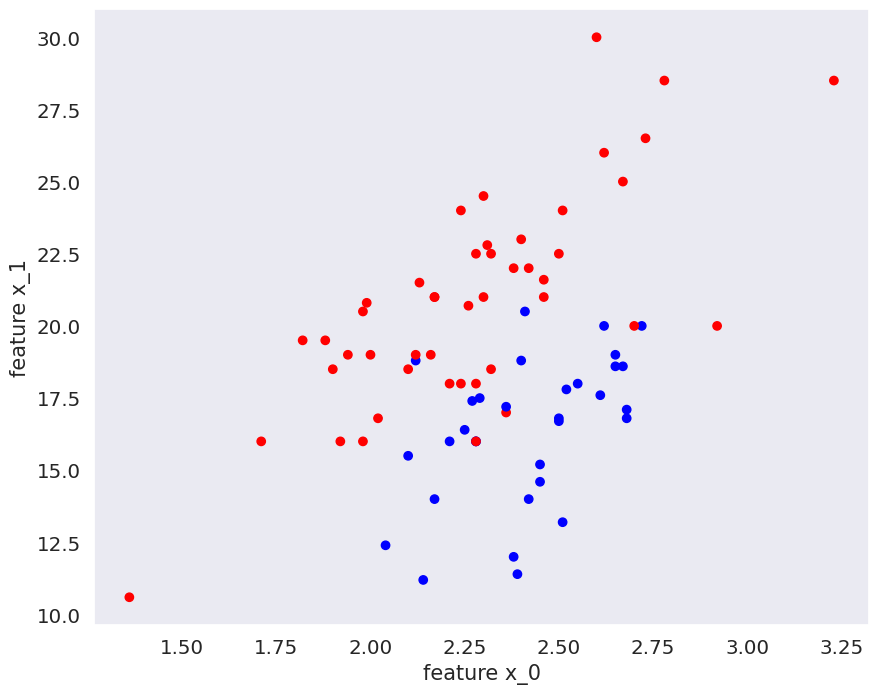

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 42)

c_train = ["red" if label == 1 else "blue" for label in y_train]
c_test = ["red" if label == 1 else "blue" for label in y_test]

plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c = c_train)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

### Train the Model
Using sklearn, we train the decision tree model on the training segment of the data using the fit() function.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=15, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

### Visualize the Model / Decision Tree
The figure below shows the decisions the model has determined useful for classifying the binary data. The root node starts out with 78 samples, 41 of which have an X_1 value of less than or equal to 18.9, so they move to the left node while the rest move to the right. Then those 41 samples treat their new node like a new root node, and so on until each data point has been classified, possibly with a few others, in a leaf node with no further decisions to be made.

|--- x_1 <= 18.90
|   |--- x_0 <= 2.03
|   |   |--- class: 1
|   |--- x_0 >  2.03
|   |   |--- x_1 <= 17.90
|   |   |   |--- x_0 <= 2.37
|   |   |   |   |--- x_0 <= 2.27
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- x_0 >  2.27
|   |   |   |   |   |--- x_1 <= 17.10
|   |   |   |   |   |   |--- x_0 <= 2.32
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- x_0 >  2.32
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- x_1 >  17.10
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- x_0 >  2.37
|   |   |   |   |--- class: 0
|   |   |--- x_1 >  17.90
|   |   |   |--- x_0 <= 2.36
|   |   |   |   |--- x_1 <= 18.65
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- x_1 >  18.65
|   |   |   |   |   |--- class: 0
|   |   |   |--- x_0 >  2.36
|   |   |   |   |--- class: 0
|--- x_1 >  18.90
|   |--- x_1 <= 20.60
|   |   |--- x_0 <= 2.29
|   |   |   |--- class: 1
|   |   |--- x_0 >  2.29
|   |   |   |--- x_0 <= 2.68
|   |   |   |   |--- class: 0

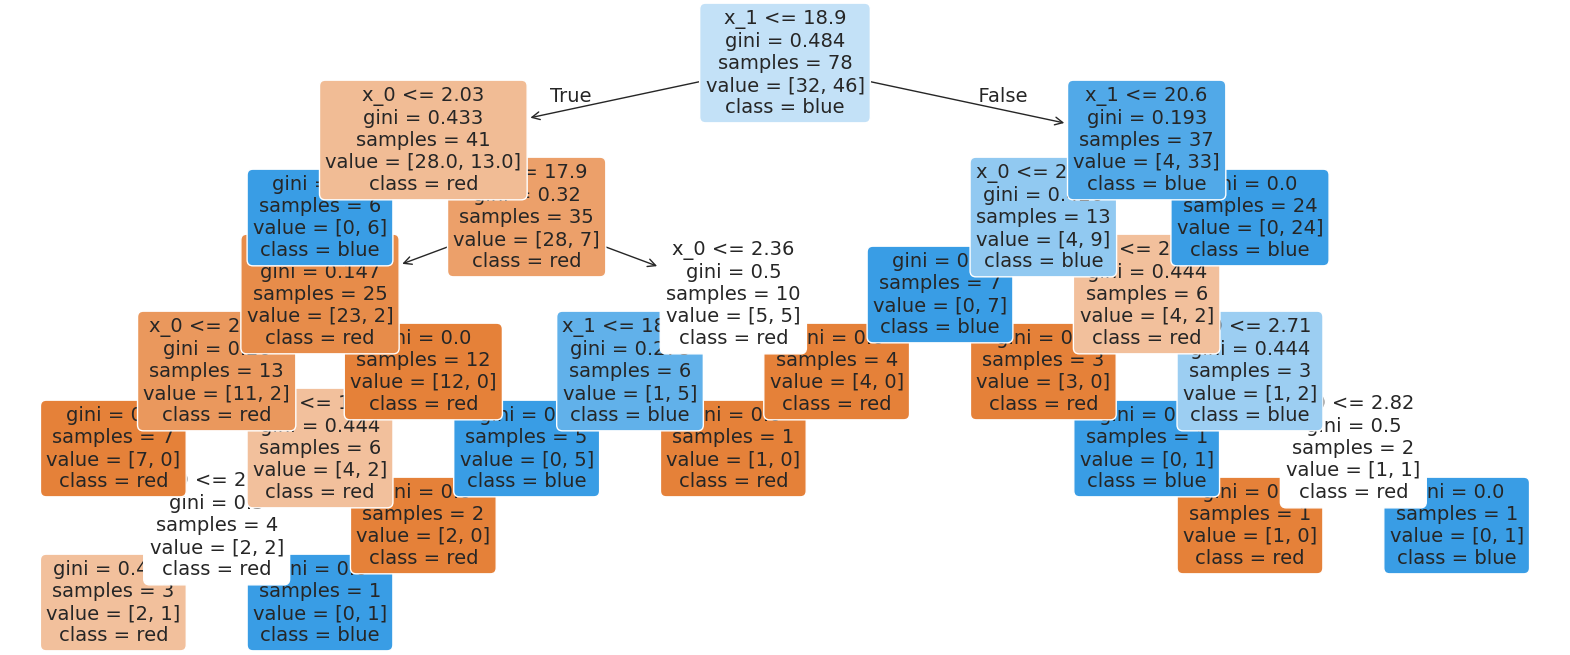

In [ ]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

tree_rules = export_text(decision_tree,
                         feature_names = ["x_0", "x_1"])
print(tree_rules, "\n")


plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
                   feature_names = ["x_0", "x_1"],
                   class_names = ["red", "blue"],
                   rounded = True,
                   filled = True,
                   fontsize=14)
plt.show()

Next, we can visualize the decision tree graphically. Using the model we've trained and the decision tree indicated above, any points in the orange area will be classified as 1, or "red" if you're comparing to the first plot in this page of code, and anything in the blue section will be classified as "blue". As you can see, it is accurate enough to be useful but does not classify every point correctly.

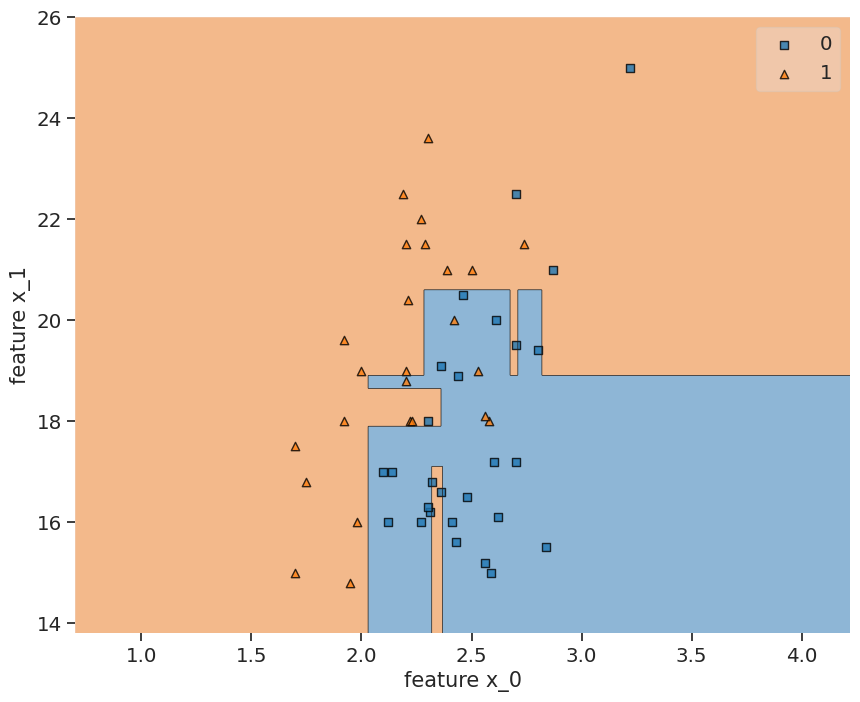

In [ ]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X_test, y_test, clf = decision_tree)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

### Evaluating the Model
Next, we can evaluate the effectiveness of our model using a confusion matrix. This indicates that 6 red data points were incorrectly classified as blue, while 5 blue data points were incorrectly classified as red. Overall the model has about 79% accuracy, which is somewhat useful but not enough to be relied upon for very important decisions needing high accuracy.

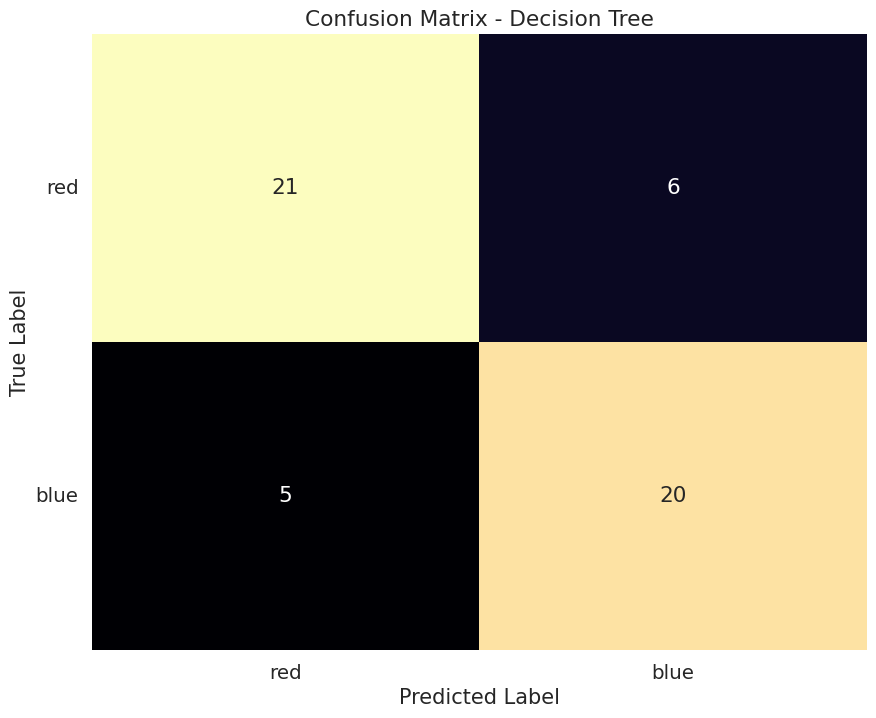

In [ ]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True,
            fmt = "g",
            ax = ax,
            cmap = "magma",
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["red", "blue"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["red", "blue"], rotation=0)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.77      0.80      0.78        25

    accuracy                           0.79        52
   macro avg       0.79      0.79      0.79        52
weighted avg       0.79      0.79      0.79        52



## Regression Trees
In the following code, we load the diabetes dataset and print a description for the data, including sources. This data will be used to attempt regression. The target value in this data is the amount of disease progression in the span of 1 year.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_linnerud
from sklearn.datasets import load_diabetes
data = load_diabetes()
X = data.data
y = data.target

# View the dataset description
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

### Data Visualization
Below are 10 plots comparing the target (disease progression in 1 year) to various data collected.

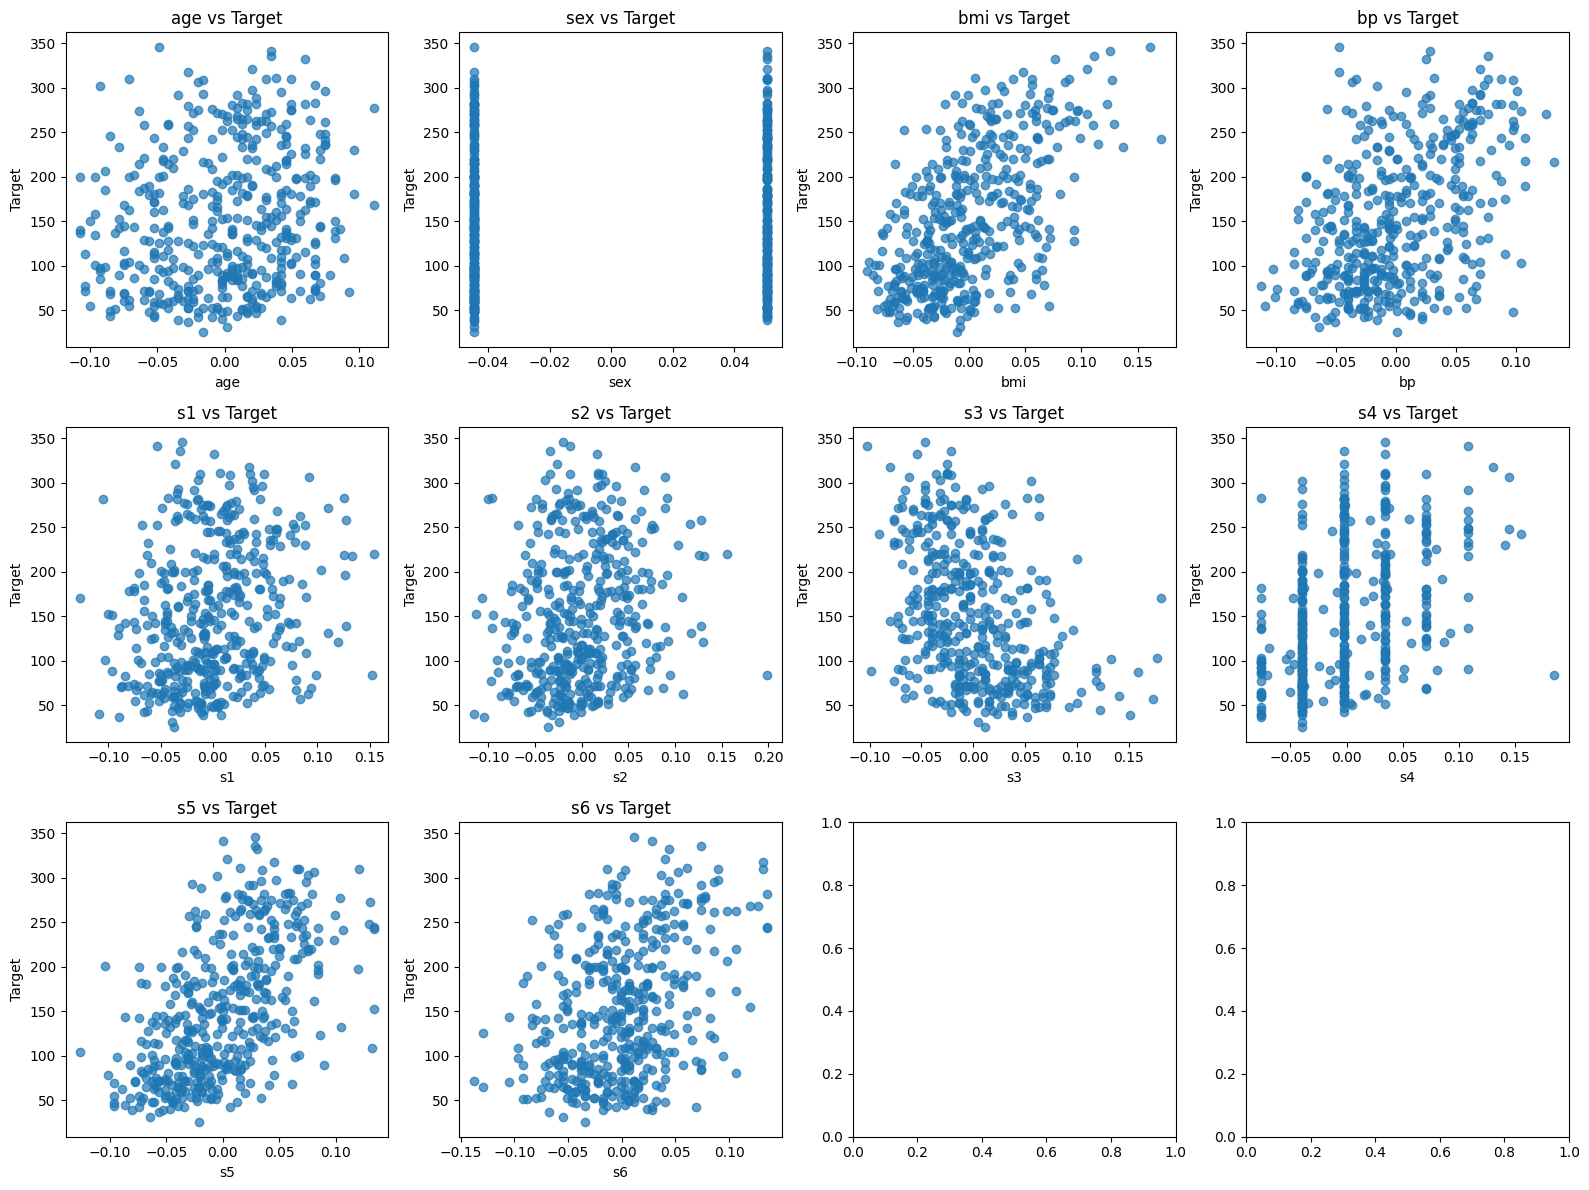

In [6]:
# Load the diabetes dataset
data = load_diabetes()
X = data.data
y = data.target

# Create a scatter plot for each feature vs. target
fig, axes = plt.subplots(3, 4, figsize=(16, 12))

for i, feature in enumerate(data.feature_names):
    ax = axes[i // 4, i % 4]  # position of the subplot
    ax.scatter(X[:, i], y, alpha=0.7)
    ax.set_xlabel(feature)
    ax.set_ylabel('Target')
    ax.set_title(f'{feature} vs Target')

plt.tight_layout()
plt.show()

#target is the amount of disease progression after 1 year


In [ ]:
X[0].shape

(10,)

In [ ]:
y[0]

151.0

### Split the Data, Train the Model
In the code cell below, sklearn is used on data which has been divided into training and testing to train the regression model.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12)

reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

### Evaluating the Model
Next, the effectiveness of the model can be evaluated by calculating the mean squared error (MSE). The results aren't looking good for this data, since the MSE is very high!

In [ ]:
from sklearn.metrics import mean_squared_error

reg1 = DecisionTreeRegressor(max_depth=5, random_state = 12)
reg1.fit(X_train, y_train)
y_pred = reg1.predict(X_test)
print(f"MSE reg1: {mean_squared_error(y_test, y_pred)} \n")


reg2 = DecisionTreeRegressor(max_depth=15, random_state = 12)
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
print(f"MSE reg2: {mean_squared_error(y_test, y_pred)} \n")


MSE reg1: 4233.796101225933 

MSE reg2: 6300.087470123184 



Let's try different max depth values, and plot how it impacts our MSE results, to see if we can improve things.

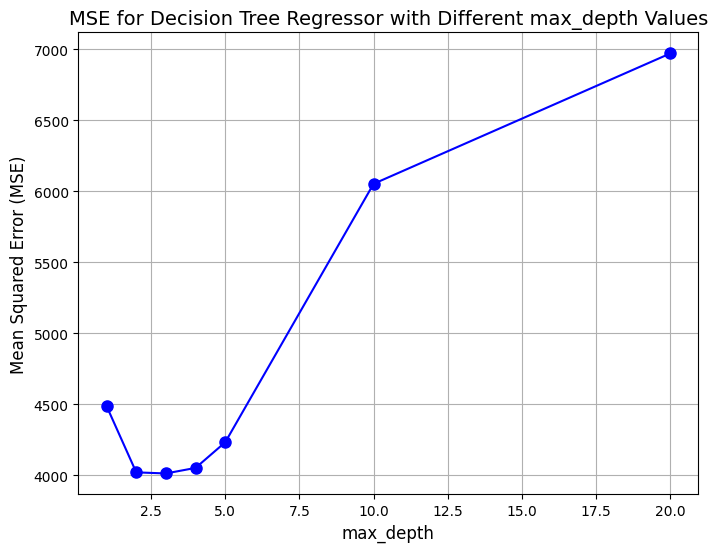

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the diabetes dataset
from sklearn.datasets import load_diabetes
data = load_diabetes()
X = data.data
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)

# List of max_depth values to test
max_depth_values = [1, 2, 3, 4, 5, 10, 20]

# List to store the MSE values for each model
mse_values = []

# Loop over different max_depth values and calculate MSE
for max_depth in max_depth_values:
    reg = DecisionTreeRegressor(max_depth=max_depth, random_state=12)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot the MSE values for different max_depth values
plt.figure(figsize=(8, 6))
plt.plot(max_depth_values, mse_values, marker='o', color='b', linestyle='-', markersize=8)
plt.title('MSE for Decision Tree Regressor with Different max_depth Values', fontsize=14)
plt.xlabel('max_depth', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.grid(True)
plt.show()

This indicates that the regression tree starts to overfit the data after a max depth of 3, but also that it wasn't very good to begin with since the MSE value is so high. The code below tries to figure out how we might be able to optimize the MSE value.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid to search through
param_grid = {
    'max_depth': [1, 3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Grid Search for hyperparameter tuning
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=12), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters found from the grid search
print(f"Best hyperparameters: {grid_search.best_params_}")

# Use the best model to predict and calculate MSE
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Optimized MSE: {mse}")
#^ even optimized MSE is enormous


Best hyperparameters: {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Optimized MSE: 4278.690686987047


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Next, let's try training the model using only the BMI data with the target, and plot a visual representation of the results.

Mean Squared Error (MSE): 4130.667981921075


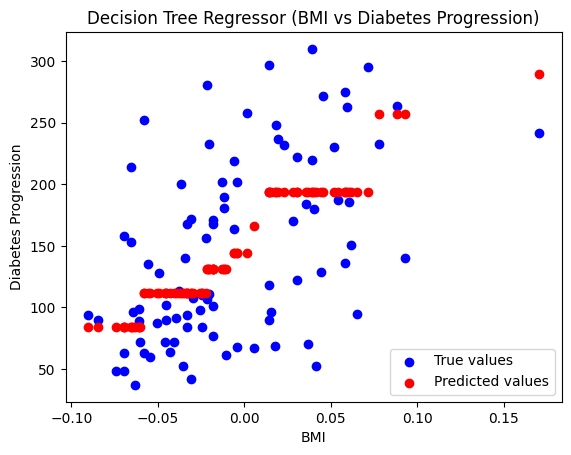

In [ ]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data  # All features
y = diabetes.target  # Target variable (diabetes progression)

# Select only the BMI feature (index 2) for X
X_bmi = X[:, 2].reshape(-1, 1)  # Reshape for compatibility (we need a 2D array)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_bmi, y, test_size=0.2, random_state=42)

# Create the DecisionTreeRegressor model
reg = DecisionTreeRegressor(max_depth=3, random_state=12)

# Fit the model
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Plot the true vs predicted values
plt.scatter(X_test, y_test, color='blue', label='True values')
plt.scatter(X_test, y_pred, color='red', label='Predicted values')
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.title('Decision Tree Regressor (BMI vs Diabetes Progression)')
plt.legend()
plt.show()


### Conclusion and Comparison
Looks like this regression model is not very good at predicting diabetes progression based on this data. Below I've included another few methods for comparison (including ensemble methods of random forest and boosting) which perform slightly better, but still have very high MSE's.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create and fit the Random Forest model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=12)
rf_reg.fit(X_train, y_train)

# Make predictions and calculate MSE
y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")


Random Forest MSE: 3797.827078378378


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and fit the Gradient Boosting model
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=12)
gb_reg.fit(X_train, y_train)

# Make predictions and calculate MSE
y_pred_gb = gb_reg.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Gradient Boosting MSE: {mse_gb}")


Gradient Boosting MSE: 3837.0204004317293
